<h1>House Prices Competition</h1>

<h2>Import Dependencies</h2>

In [54]:
! pip install seaborn

You should consider upgrading via the 'C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [55]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h2>Import Data

In [56]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

test_df.shape, train_df.shape

((1459, 80), (1460, 81))

<h2>Quick Look at the Data

In [57]:
#check the decoration
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h3>Observations</h3>
<p>Some of the features that look like they have a great impact in the Sale Price of an house are:</p>
<ul>
<li>OverallQual
<li>YearBuilt
<li>TotalBsmtSF
<li>GrLivArea
</ul>

<h3>Analysing 'SalePrice'

In [59]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

[Text(0.5, 1.0, 'Distribution of Sale Price label')]

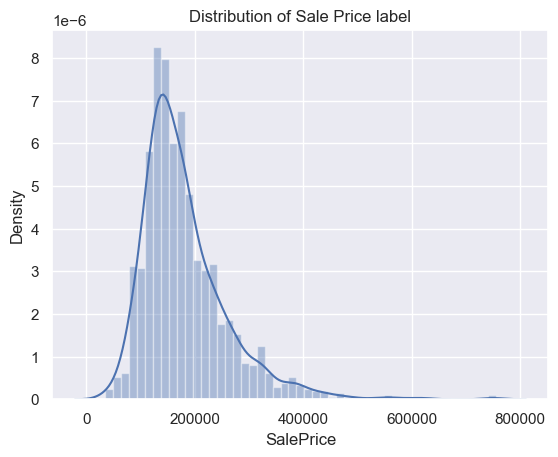

In [60]:
plot = sns.distplot(train_df['SalePrice'])
plot.set(title='Distribution of Sale Price label')

<h3>Observations</h3>
<ul>
<li>Deviate from the normal distribution.
<li>Have appreciable positive skewness.
<li>Shows peakedness.
</ul>

<p>Data with higher kurtosis have heavy tails and tend to have more outliers

In [61]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h3>Sale Price interaction with some features

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

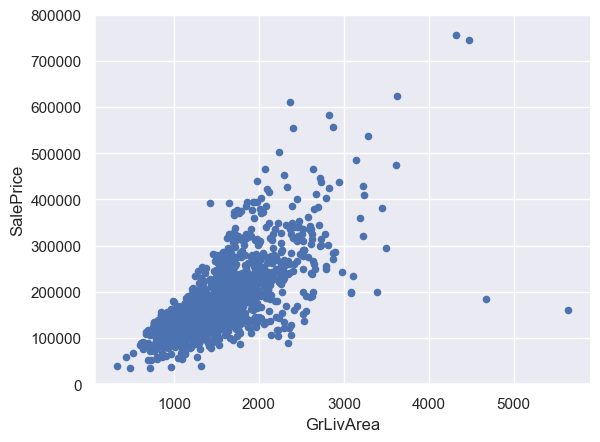

In [62]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<h3>Observations</h3>
<p>Looks like there is some type of relation between the feature 'GrLivArea' and the 'SalePrice'. More specifically a linear one

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

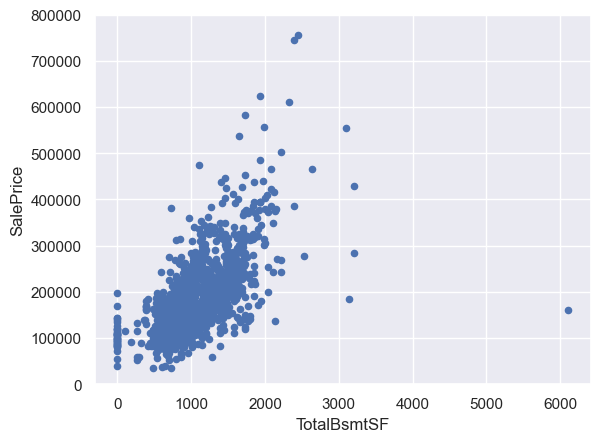

In [63]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<h3>Observations</h3>
<p>Looks like there is some type of relation between the feature 'TotalBsmtSF' and the 'SalePrice'. Appears to either be a linear relation with high slope or a a exponential one. I also looks like there is times when TotalBsmtSF has zero value but in those cases the SalePrice isnt always teh same. It seems that sometimes it has no impact on the SalePrice.

(-0.5, 9.5, 0.0, 800000.0)

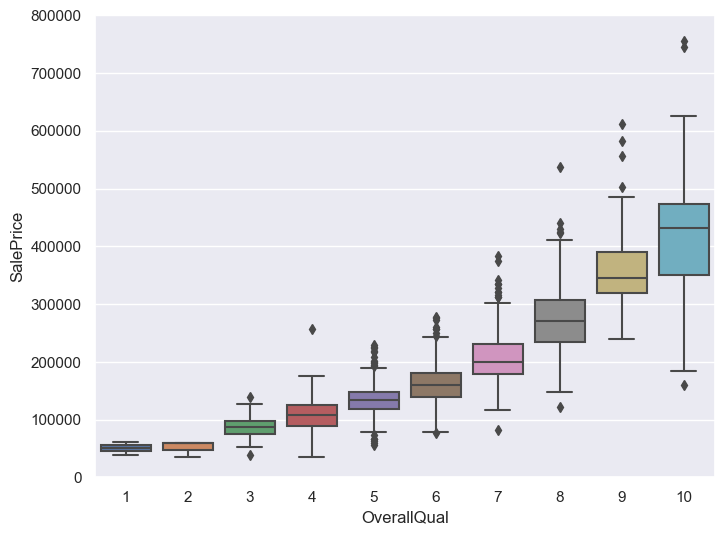

In [64]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<h3>Observations</h3>
<p>Looks like the better the OverallQual is, the higher the SalePrice

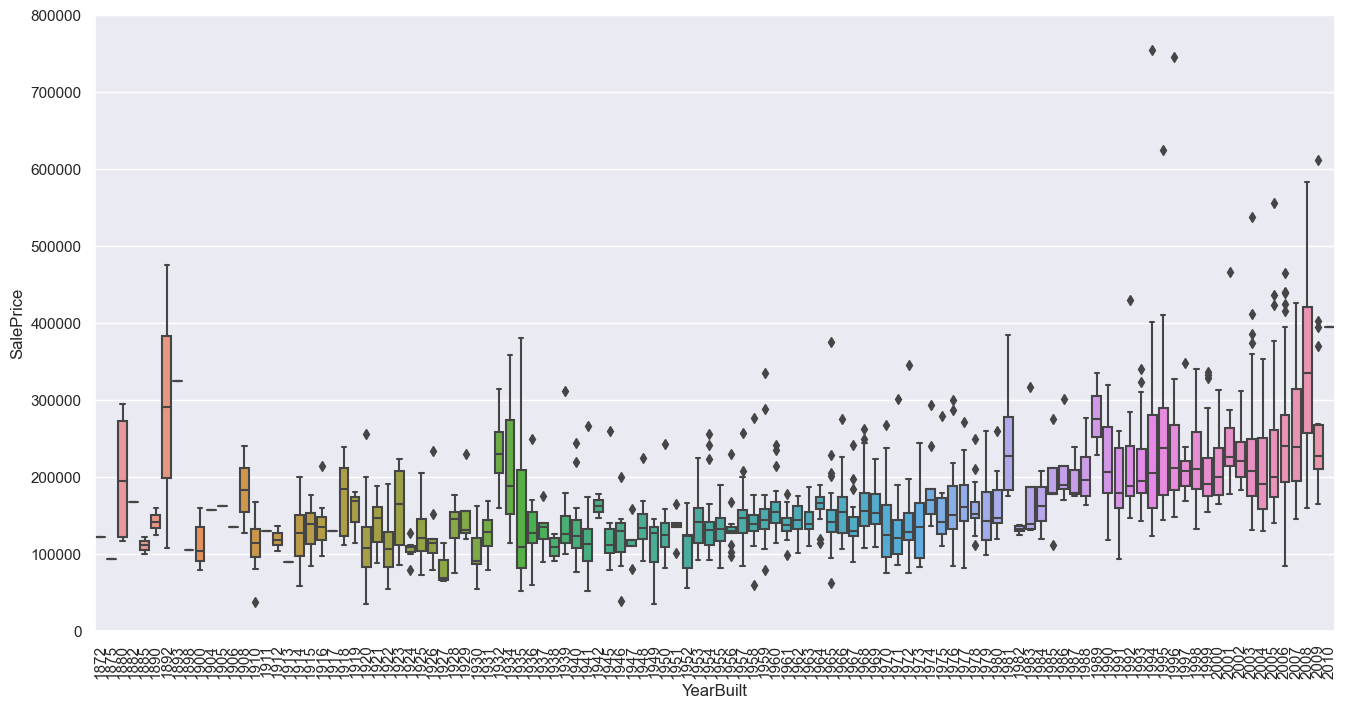

In [65]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<h3>Observations</h3>
<p>There is no aparent relation between YearBuilt and SalePrice. Though it looks like the more recent houses look like they have higher SalePrice</p>

<h4>Note</h4>
<p>One aspect to take into account in this analysis is that the YearSold is not teh same to all so the inflation is a value to take into account as well

<h3>In Summary</h3>
<p>The features 'GrLivArea', 'TotalBsmtSF' and 'OverallQual' all seem to have an impact in the SalePrice. There many more features that weren't analysed yet, but it is possible to assume that are others that also have good relation into the SalePrice.</p>
<p>From these facts it is possible to say that the trick is the correct choice of features (Feature Selection), rather the focus on deriving complex features form the one s already present (Feature Engineering).

<h2>Deeper Data Analysis<h2>

<p>Before, it was chosen a subjective approach to the observationn of the data, but this is not the most correct way of doing it. It is good to take an intial look up, but not sustainable to a grasp a very big feature collection.<p>

<p>Let's make some sense of the data and the correlation between features/label with:</p>
<ul>
<li>Correlation matrix (heatmap)
<li>'SalePrice' correlation matrix
<li>Scatter plots between the most correlated variables
</ul>

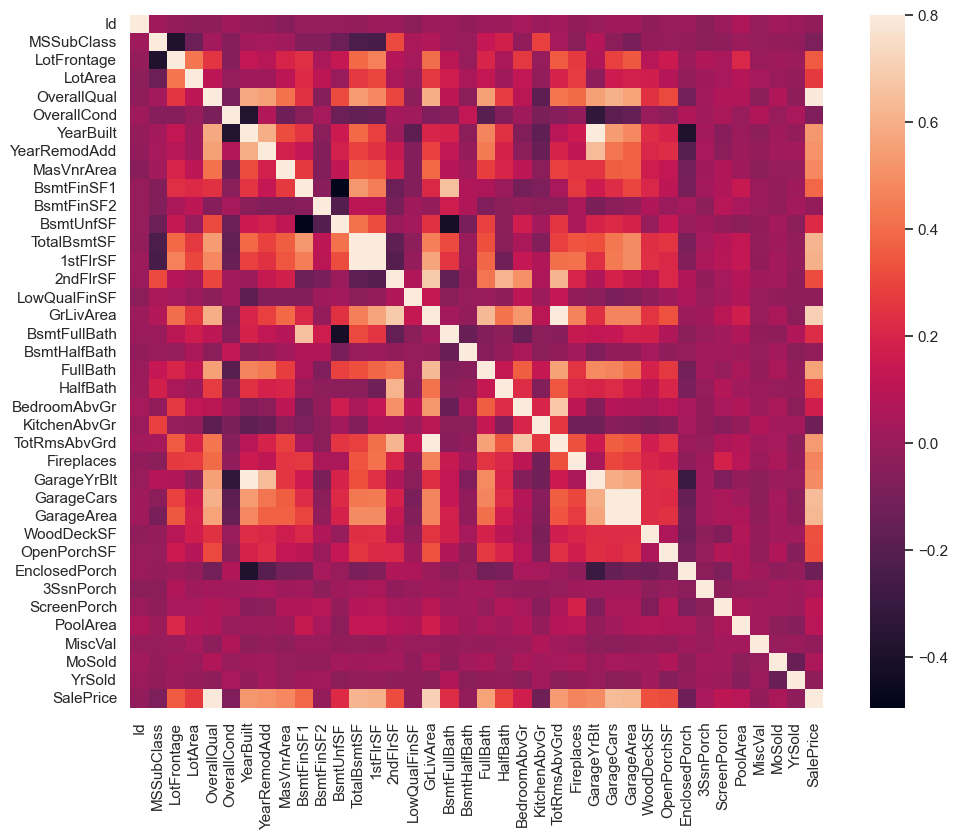

In [66]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<h3>Observations</h3>
<p>There are two areas with high correlation that pop out.</p>
<p>Between 'TotalBsmtSF' and '1stFlrSF', and also between 'GarageX' features.</p>
<p>The correlation is so strong that it can indicate multicolinearity. This means that both feature are giving almost the same information</p>
<p>
<p>From the 'SalePrice' correlations, beside the features that were already identified before 'GrLivArea', 'TotalBsmtSF', and 'OverallQual', there are also more that have good correlation with the target.</p>

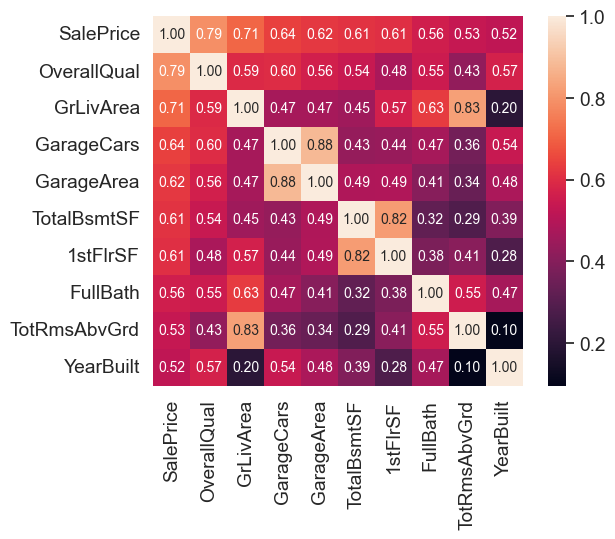

In [67]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h3>Observations</h3>
<li>OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'</li>
<li>'GarageCars' and 'GarageArea' are very correlated and as said before it is because one is consequence of the other, giving basically the same information. So it is possible to choose one of them. Let's choose 'GarageCars' because it has higher correlation with the label</li>
<li>The same can be applied to 'TotalBsmtSF' and '1stFlrSF'. Let´s take 'TotalBsmtSF'</li>
<li>The same can be applied to 'TotRmsAbvGrd' and 'GrLivArea'. Let´s take 'GrLivArea'</li>

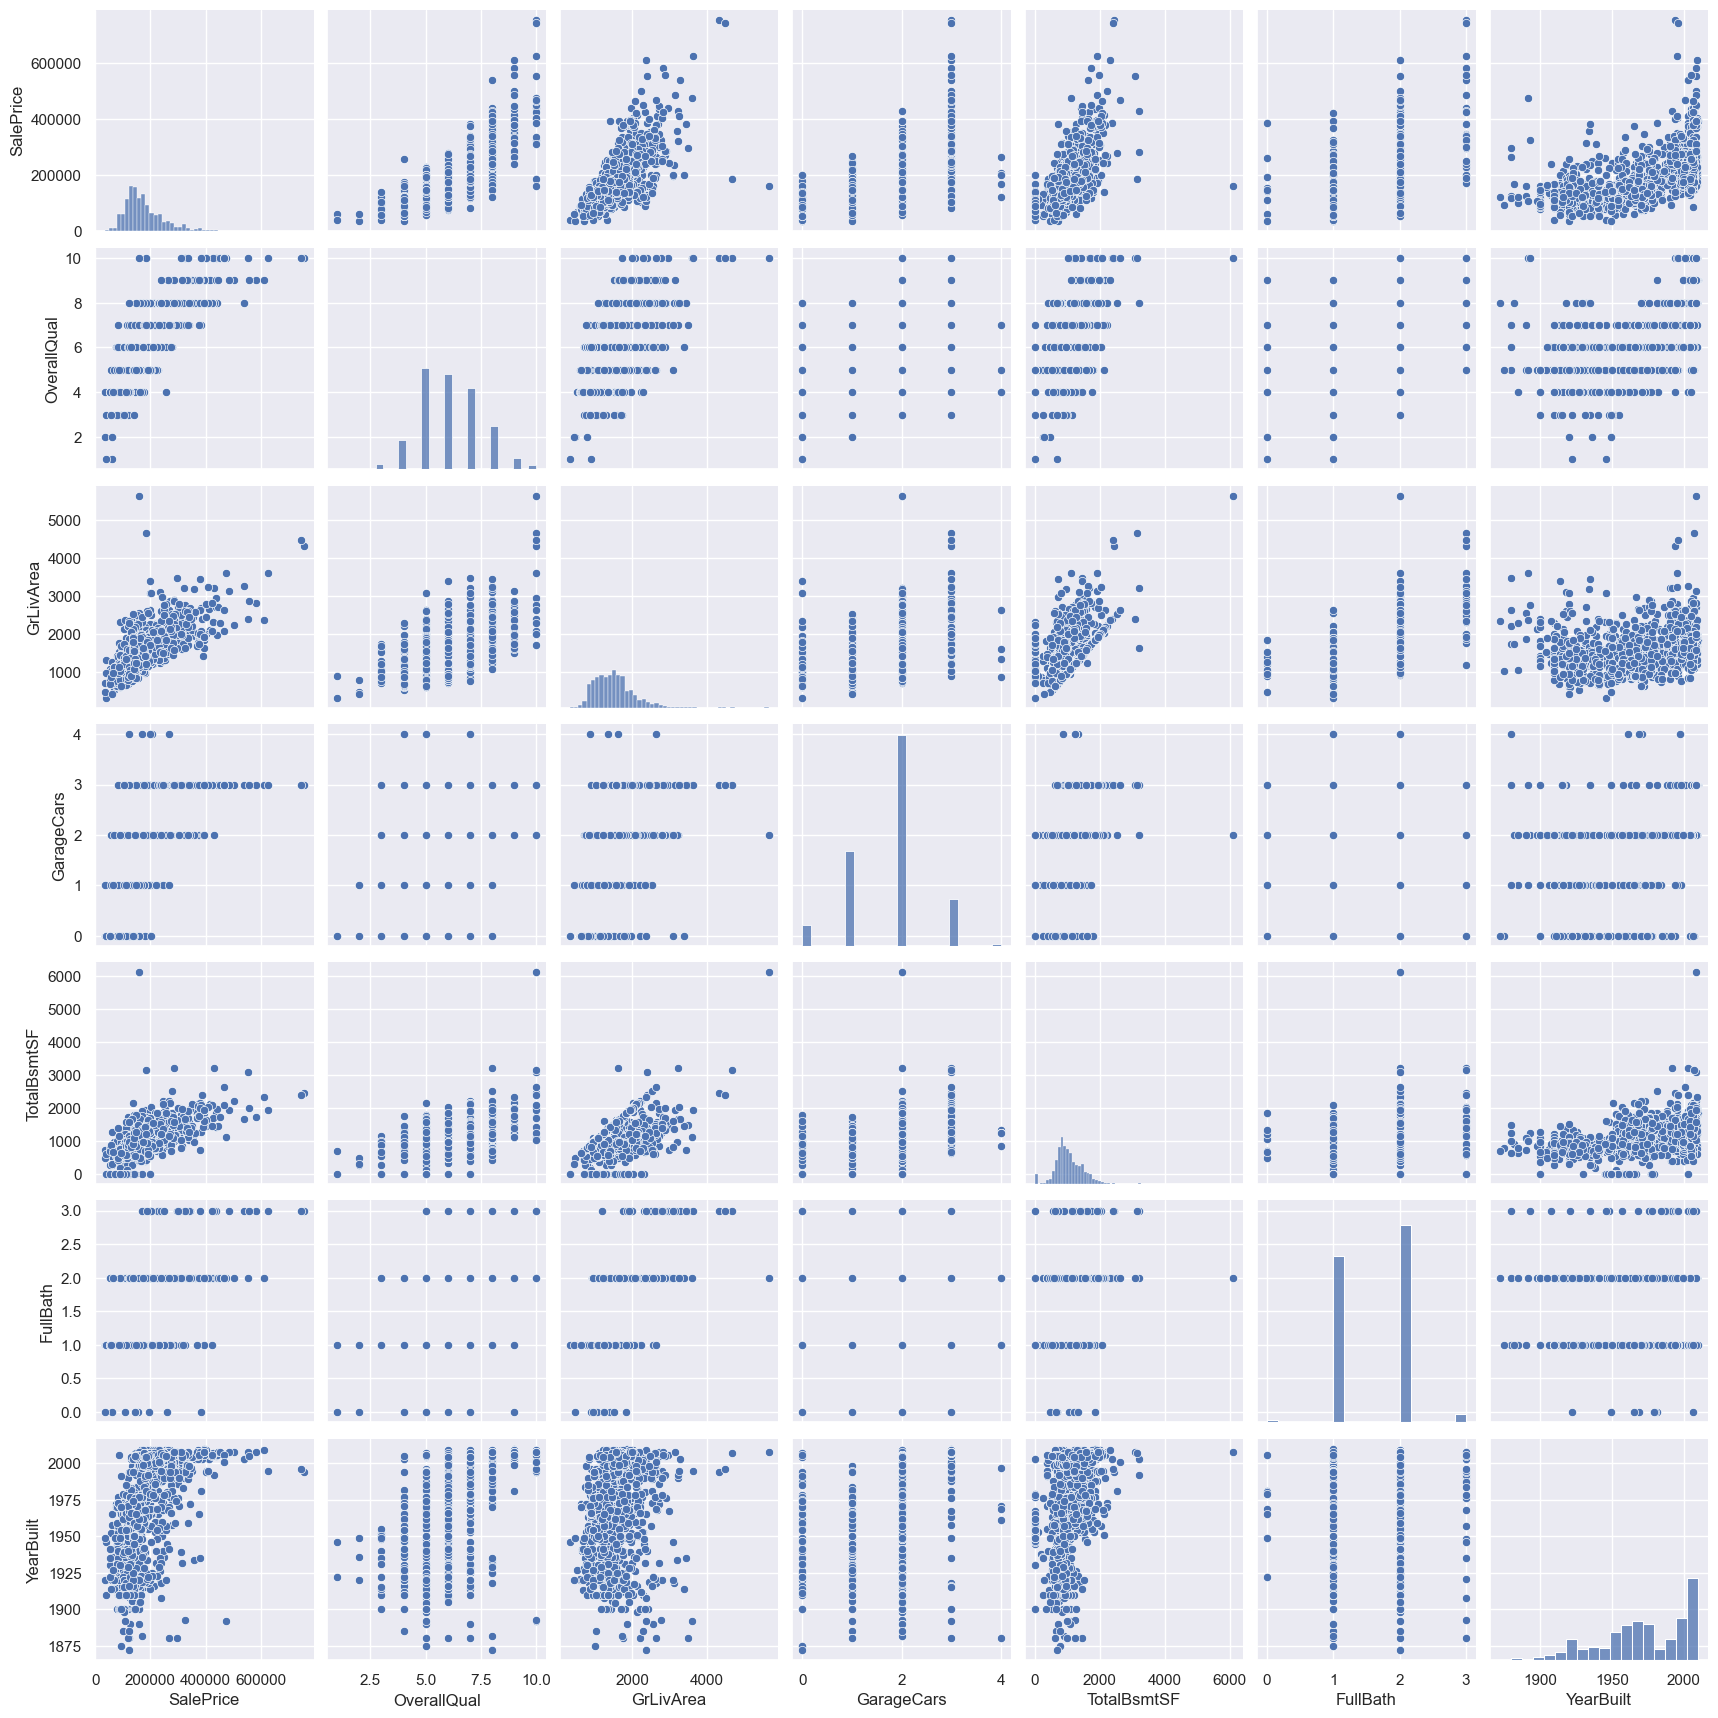

In [68]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

<h3>Observations</h3>
<p>It is possible to see here the relations between the features and teh label, and also between themselves

<h2>Missing Data</h2>
<p>It is important to take into acconut missing values in the data in order to create the best model possible</p>
<p>Some of teh questions to take into account:</p>
<li>How prevalent is the missing data?</li>
<li>Is missing data random or does it have a pattern?</li>

In [69]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20 )

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


<h3>Observations</h3>
<p>Let's make the rule that the features with more than 15% of missing values are removed completely</p>
<p>The GarageX features seem to be the same observations that are missing on since they are exactly the same number. Since the info can be basically summed up in 'GarageCars' it is possobel to delete all the GarageX features. The same for BasmtX features</p>
<p>There is an Electrical value missing so there are 2 differnt options, imputation or just simply drop the observation. Let's drop the observations in this case</p>
<p>In the case of the missing values in MasVnrX feautures, let's just drop those observations as well</p>

In [70]:
test_df.shape, train_df.shape

((1459, 80), (1460, 81))

In [71]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 8]).index, 1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df = train_df.drop(train_df.loc[train_df['MasVnrArea'].isnull()].index)
train_df = train_df.drop(train_df.loc[train_df['MasVnrType'].isnull()].index)

test_df = test_df.drop((missing_data[missing_data['Total'] > 8]).index, 1)

train_df.isnull().sum().max()
test_df.shape, train_df.shape

((1459, 64), (1451, 65))

<h2>Outliers</h2>
<p>Let's now deal with the outliers in the data</p>

<h3>Univariate analysis</h3>

<p>The primary concern is to find a threshold from which it is considered an observation an outlier. To do it let's standardize the data. In this context  data standardization means converting data values to have mean of 0 and a standard deviation of 1.</p>

In [72]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83798299]
 [-1.83279915]
 [-1.80014472]
 [-1.78248685]
 [-1.77365792]
 [-1.62230481]
 [-1.61599843]
 [-1.58446654]
 [-1.58446654]
 [-1.57194207]]

outer range (high) of the distribution:
[[3.83901988]
 [4.0513809 ]
 [4.50749611]
 [4.72191302]
 [4.74185379]
 [5.07422522]
 [5.43651411]
 [5.60480615]
 [7.11833725]
 [7.24446484]]


<h3>Observations</h3>
<li>Low range values are similar ad too far from 0
<li>High range valuess are far away from 0 and the values of 7 are really out of range

<h3>Bivariate analysis</h3>
<p>Let's take a look at the distribution of SalePrice given GrLivArea

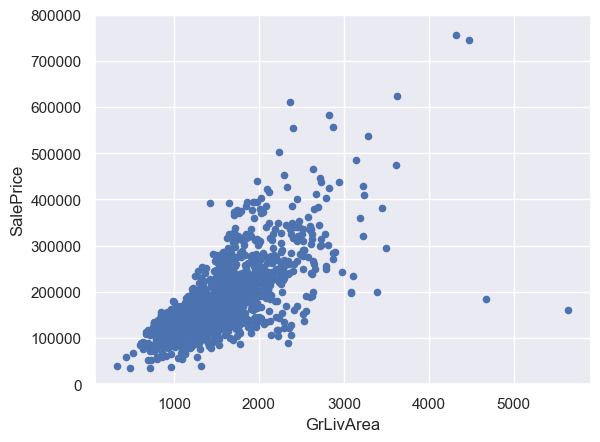

In [73]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<h3>Observations</h3>
<li>There is clerly two data points with bigger GrLivArea that don't follow the flow of the growing value of SalePrice. Maybe it is a case of sale of a completely rural terrain, which would bring down the value of the property compared to if there was an habitational area. But just a guess... It is possible say that they are outliers, let's remove them
<li>There are also two observations that are the highest value of SalePrice that seem a bit out of the overall crescendum of the value for the GrLivArea. But still, following somewhat the trend. (These are the 7 values presented before)

In [74]:
#deleting points
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index)

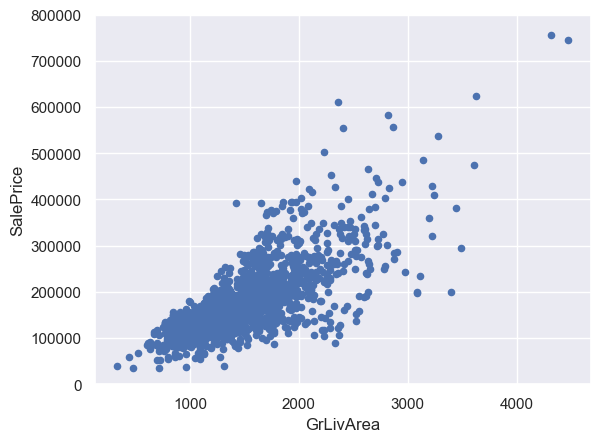

In [75]:
#bivariate analysis saleprice/grlivarea after removing outliers
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

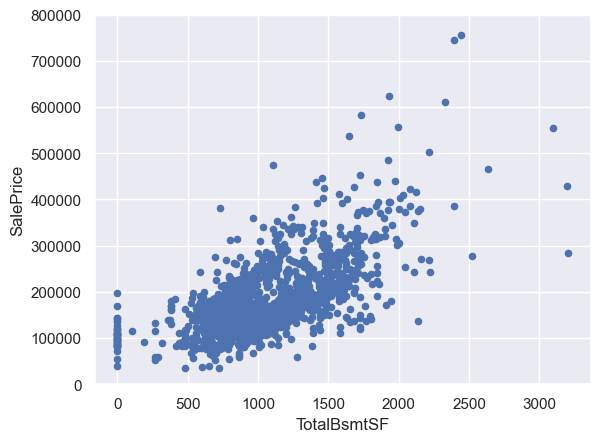

In [76]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<h2>Going Deeper

<p>It is necessary to uderstand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.</p>

<p>There are four assumptions that should be tested:</p>
<li><strong>Normality</strong> - It is important to verify that the data should have a distribution like a normal distribution, because some statistics test rely on the fact that the data has a normal distribution.</li>
<li><strong>Homoscedasticity</strong> - </li>
<li><strong>Linearity</strong> - If the patterns are not linear, it is good to look at data transformation. It is possible to verify this through scatter plots.</li>
<li><strong>Absence of correlated errors</strong> - happens when one error is correlated to another, meaning that there is a relationship between these variables.</li>


<h3>Normality

<p>Let's test 'SalePrice'.</p>
<li><strong>Histogram</strong> - test for Kurtosis and skewness</li>
<li><strong>Normal Probability Plot</strong> - Data distribution should follow the diagonal that represents the normal distribution</li>

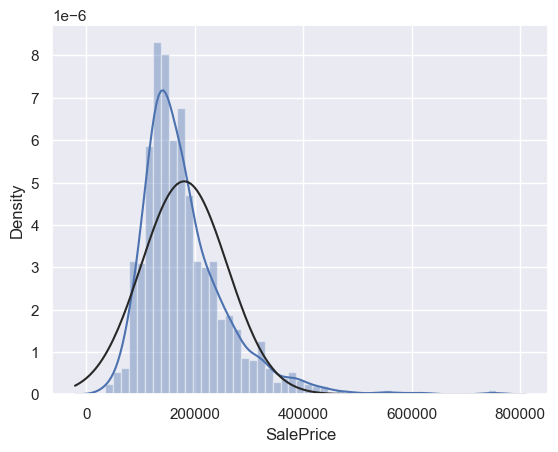

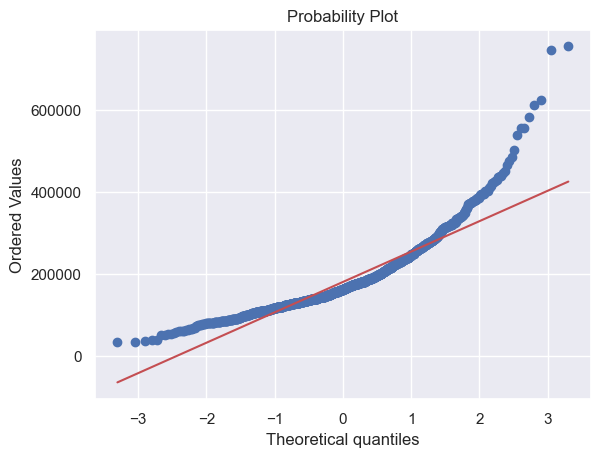

In [77]:
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

<h3>Observation</h3>
<p>We can see peakedness, positive skewness and doesn't follow the diagonal line</p>
<p>Data transformations can solve these issues. In case of positive skewness, log transformations usually work well.</p>

In [78]:
#applying log transformation
train_df['SalePrice'] = np.log(train_df['SalePrice'])

test_df.shape, train_df.shape

((1459, 64), (1449, 65))

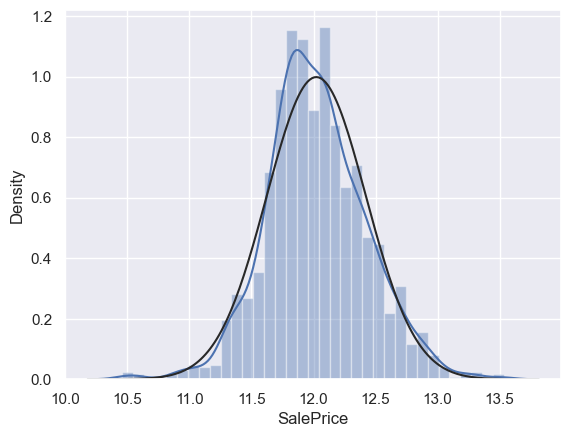

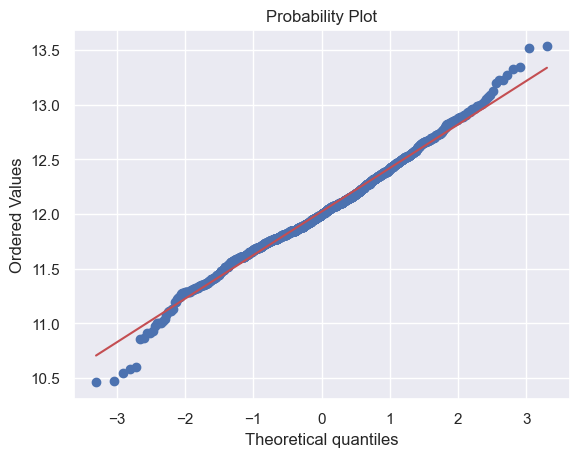

In [79]:
#transformed histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

<p>Looks better!</p>
<p>Let's look now at 'GrLivArea'</p>

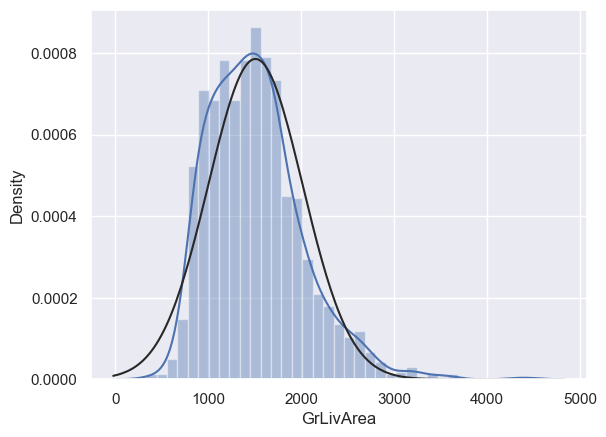

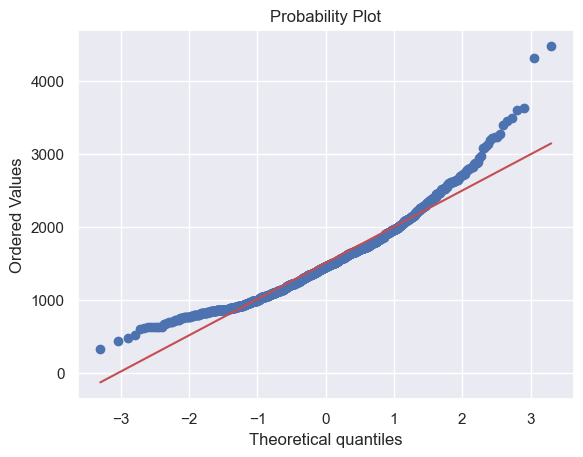

In [80]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

Looks like skewness again. Let's do the same log transformation.

In [81]:
#data transformation
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
test_df['GrLivArea'] = np.log(test_df['GrLivArea'])
test_df.shape, train_df.shape

((1459, 64), (1449, 65))

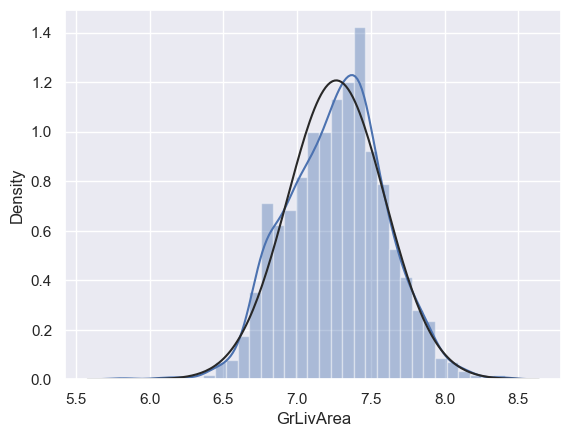

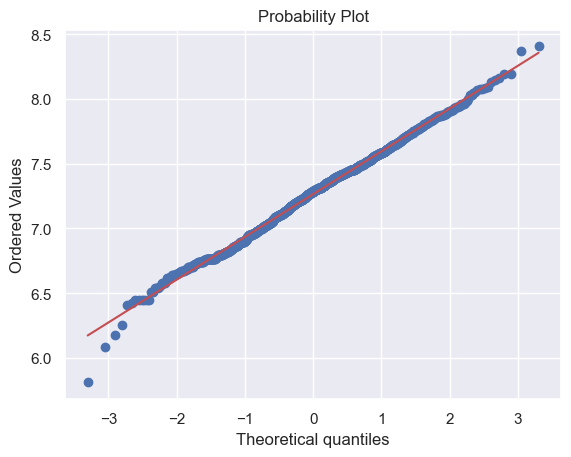

In [82]:
#transformed histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

<p>Next one

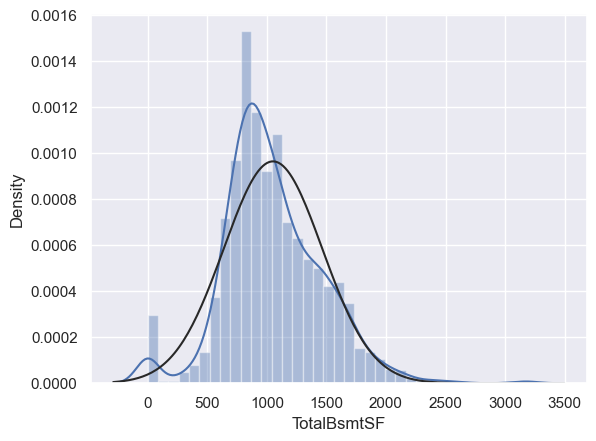

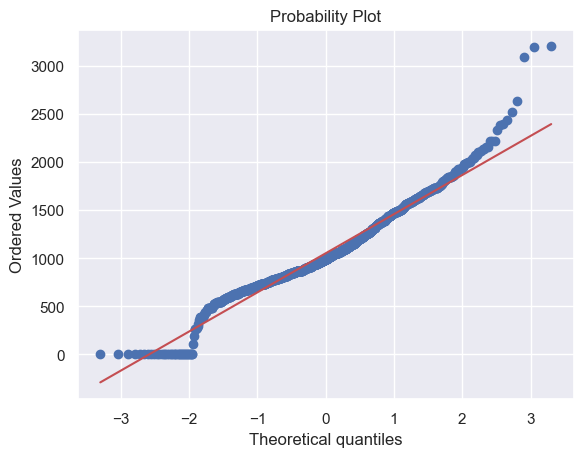

In [83]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

<h3>Observations</h3>
<p>There is some interesting aspects here.</p>
<li>Presents positive skewness</li>
<li>Significant number of 0 values in the data.</li>
<li>The 0 values don't allow the log transformation</li>

Not sure if it is a good idea, but let's apply the log transform to all the non-zero values. Let's take a risk...

In [84]:
#transform data
train_df.loc[train_df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])
test_df.loc[test_df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(test_df['TotalBsmtSF'])
test_df.shape, train_df.shape

((1459, 64), (1449, 65))

<h3>Homoscedasticity</h3>
<p>The best approach to test Homoscedasticity is graphically. If the distribution graph has dispersions on either of the ends or has very large number of points in the center of the distribution, forming a diamond-like figure.</p>

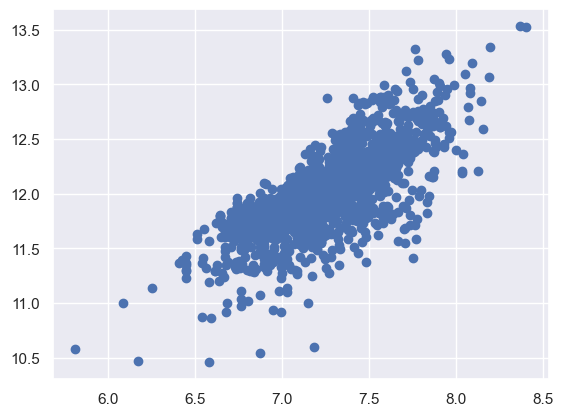

In [85]:
#scatter plot
plt.scatter(train_df['GrLivArea'], train_df['SalePrice']);

'SalePrice' / 'GrLivArea' distribution looks good!

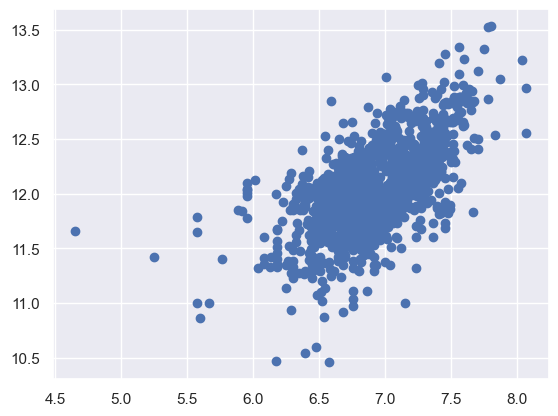

In [86]:
#scatter plot
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], train_df[train_df['TotalBsmtSF']>0]['SalePrice']);

After the adaptation done to the log tarnsformation, it looks like the levels of variance are basically equal across the range of 'TtoatalBsmtSF'. Nice!

<p>The last step is to convert the categorical features into Dummies. And that's it!</p>

In [87]:
test_df.shape, train_df.shape

((1459, 64), (1449, 65))

In [88]:
X = train_df.drop('SalePrice', axis=1)
X_total = pd.concat([X,test_df])
X_total.shape

(2908, 64)

In [89]:
X_total = pd.get_dummies(X_total)

In [90]:
X_total.shape

(2908, 225)

In [91]:
X_tr = X_total[:1449]
X_tr.shape
X_te = X_total[1449:]
X_te.shape

(1459, 225)

In [92]:
# Simple function to expose clearer the info about missing and uniqueness of entries in the data
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

In [93]:
summary(X_tr)

Dataset has 225 features and 1449 examples.


,Unique,Missing,Duplicated,Types
Id,1449,0,0,int64
MSSubClass,15,0,0,int64
LotArea,1064,0,0,int64
OverallQual,10,0,0,int64
OverallCond,9,0,0,int64
...,...,...,...,...
SaleCondition_AdjLand,2,0,0,uint8
SaleCondition_Alloca,2,0,0,uint8
SaleCondition_Family,2,0,0,uint8
SaleCondition_Normal,2,0,0,uint8


This was the data preparation executed by me, but there are many other techniques that were not mentioned like Imputation of missing values, study of Mutual Information scores, Feature Engineering, etc, besides the lack of full in-depth data treatment of all the features chosen for the training of the model. One other point missing is the study of the idea that some of the numerical data might actually be categoricals in disguise.

<p>Let's now talk about the Model</p>

<h2>Model Training</h2>

Let's try a XGBClassifier model.

In [94]:
! pip install xgboost

import xgboost
from sklearn.model_selection import train_test_split

You should consider upgrading via the 'C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, train_df[['SalePrice']], test_size=0.2)

In [96]:
! pip install optuna

You should consider upgrading via the 'C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [97]:
! pip install typing-extensions --upgrade

You should consider upgrading via the 'C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [98]:
! pip install -U typing_extensions

You should consider upgrading via the 'C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [99]:
from sklearn.model_selection import KFold, cross_val_score

def score_dataset(X, y, model=xgboost.XGBRegressor()):
    # Label encoding for categoricals
    #
    # Label encoding is good for XGBoost and RandomForest, but one-hot
    # would be better for models like Lasso or Ridge. The `cat.codes`
    # attribute holds the category levels.
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [100]:
from typing_extensions import Concatenate
import optuna

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgb = xgboost.XGBRegressor(**xgb_params)
    return score_dataset(X_train, y_train, xgb)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

[I 2023-08-06 19:52:04,491] A new study created in memory with name: no-name-3153a716-8ece-42bb-a104-0d55b8c41ed2
[I 2023-08-06 19:52:23,192] Trial 0 finished with value: 0.010381365728352625 and parameters: {'max_depth': 3, 'learning_rate': 0.0582295953575572, 'n_estimators': 1779, 'min_child_weight': 10, 'colsample_bytree': 0.715593967006152, 'subsample': 0.4865831876112503, 'reg_alpha': 0.000698685623353576, 'reg_lambda': 0.00032916158876400214}. Best is trial 0 with value: 0.010381365728352625.
[I 2023-08-06 19:52:39,267] Trial 1 finished with value: 0.014891268709734475 and parameters: {'max_depth': 9, 'learning_rate': 0.004494912445348966, 'n_estimators': 1488, 'min_child_weight': 1, 'colsample_bytree': 0.3860958230484548, 'subsample': 0.7235013912562773, 'reg_alpha': 0.6787368907085535, 'reg_lambda': 1.0295254972678909}. Best is trial 0 with value: 0.010381365728352625.
[I 2023-08-06 19:53:34,340] Trial 2 finished with value: 0.019985163583478325 and parameters: {'max_depth': 2,

In [101]:
model = xgboost.XGBRegressor(**xgb_params)

In [102]:
y_train[:10]

,SalePrice
176,12.259613
34,12.533576
1233,11.863582
1272,11.827736
31,11.914048
112,12.858320
1346,12.478006
747,12.491173
937,12.441145
949,12.193494


In [103]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8157835268221092, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0030429783275243093,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=6082, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
# make predictions
predictions = np.exp(model.predict(X_te))


In [105]:
predictions[:10]
len(predictions)

1459

In [106]:
predict = pd.DataFrame({'Id': X_te['Id'], 'SalePrice':predictions})
predict.to_csv("./predictions/predictions_1.csv", index=False)